# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
import pandas as pd 
import numpy as np 
from citipy import citipy
from api_keys import weather_api_key
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#Set url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city

#Create list for data to be added to 
data=[]

#Loop through cities and append data
for city in cities:
    all_data=requests.get(url).json()
    data.append({"City": city,
                          "Lat": all_data["coord"]["lat"],
                          "Lng": all_data["coord"]["lon"],
                          "Max Temp": all_data["main"]["temp_max"],
                          "Humidity": all_data["main"]["humidity"],
                          "Cloudiness": all_data["clouds"]["all"],
                          "Wind Speed": all_data["wind"]["speed"],
                          "Country": all_data["sys"]["country"],
                          "Date": all_data["dt"]})
#Print data
print(data)

[{'City': (0, 'rikitea'), 'Lat': -8.0089, 'Lng': -34.8553, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 12.66, 'Country': 'BR', 'Date': 1614944024}, {'City': (1, 'avarua'), 'Lat': -8.0089, 'Lng': -34.8553, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 12.66, 'Country': 'BR', 'Date': 1614944024}, {'City': (2, 'usevya'), 'Lat': -8.0089, 'Lng': -34.8553, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 12.66, 'Country': 'BR', 'Date': 1614944024}, {'City': (3, 'qaanaaq'), 'Lat': -8.0089, 'Lng': -34.8553, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 12.66, 'Country': 'BR', 'Date': 1614944024}, {'City': (4, 'marietta'), 'Lat': -8.0089, 'Lng': -34.8553, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 12.66, 'Country': 'BR', 'Date': 1614944024}, {'City': (5, 'podgornoye'), 'Lat': -8.0089, 'Lng': -34.8553, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 40, 'Wind Speed': 12.66, 'Country': 'BR', 'Dat

In [23]:
#Convert to df
data_df=pd.DataFrame(data)

#Export to .csv
data_df.to_csv("Output/city_data.csv", index=False, header=True)
data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"(0, rikitea)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
1,"(1, avarua)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
2,"(2, usevya)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
3,"(3, qaanaaq)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
4,"(4, marietta)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

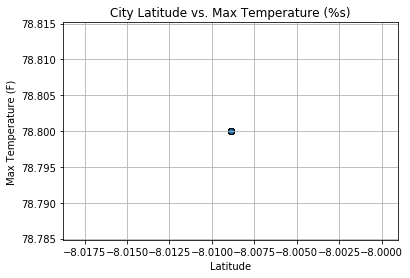

In [21]:
#Define axis
x_axis=data_df["Lat"]
y_axis=data_df["Max Temp"]

#Create scatter
plt.scatter(x_axis, y_axis, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Add labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Output/Lat_vs_Temp.png")

#Show plot
plt.show()


## Latitude vs. Humidity Plot

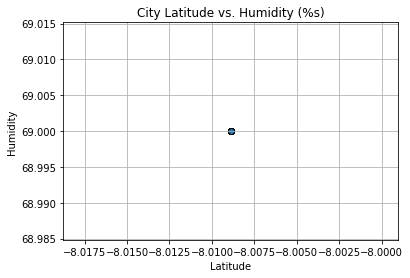

In [24]:
#Define axis
x_axis=data_df["Lat"]
y_axis=data_df["Humidity"]

#Create scatter
plt.scatter(x_axis, y_axis, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Add labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Output/Lat_vs_Humidity.png")

#Show plot
plt.show()


## Latitude vs. Cloudiness Plot

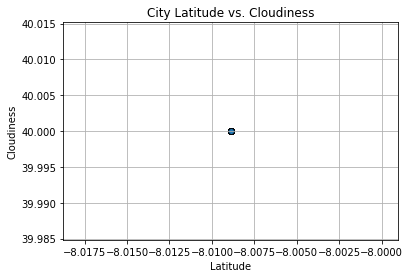

In [25]:
#Define axis
x_axis=data_df["Lat"]
y_axis=data_df["Cloudiness"]

#Create scatter
plt.scatter(x_axis, y_axis, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Add labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save 
plt.savefig("Output/Lat_vs_Cloudiness.png")

#Show plot
plt.show()


## Latitude vs. Wind Speed Plot

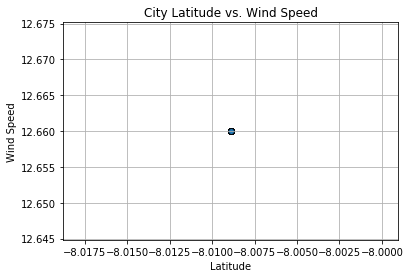

In [26]:
#Define axis
x_axis=data_df["Lat"]
y_axis=data_df["Wind Speed"]

#Create scatter
plt.scatter(x_axis, y_axis, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Add labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Output/Lat_vs_WindSpeed.png")

#Show plot
plt.show()


## Linear Regression

In [41]:
 # Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = data_df.loc[(data_df["Lat"] >= 0)]
southern_hemi_df = data_df.loc[(data_df["Lat"] < 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"(0, rikitea)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
1,"(1, avarua)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
2,"(2, usevya)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
3,"(3, qaanaaq)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
4,"(4, marietta)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
...,...,...,...,...,...,...,...,...,...
629,"(629, bubaque)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
630,"(630, qui nhon)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
631,"(631, cotonou)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024
632,"(632, san rafael)",-8.0089,-34.8553,80.6,69,40,12.66,BR,1614944024


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

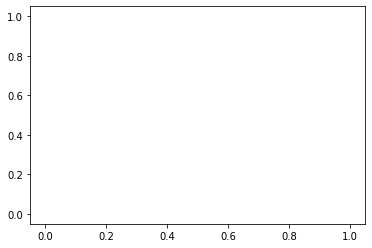

In [37]:
#Create scatter plot
x_axis= northern_hemi_df["Max Temp"]
y_axis= northern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


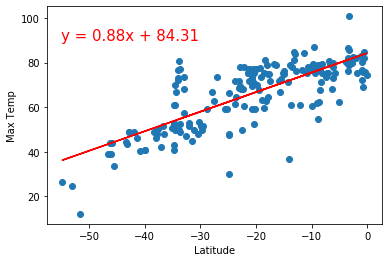

In [26]:
#Create scatter plot
x_axis= southern_hemi_df["Max Temp"]
y_axis= southern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


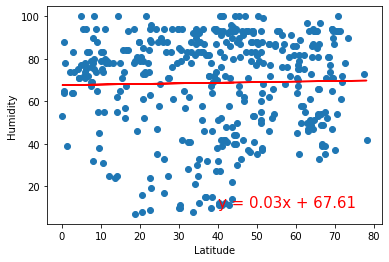

In [27]:
#Create scatter plot
x_axis= northern_hemi_df["Humidity"]
y_axis= northern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


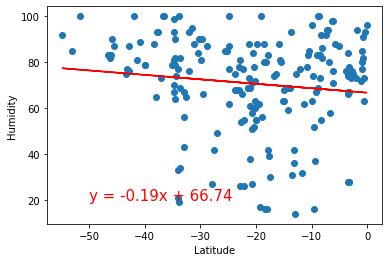

In [28]:
#Create scatter plot
x_axis= southern_hemi_df["Humidity"]
y_axis= southern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


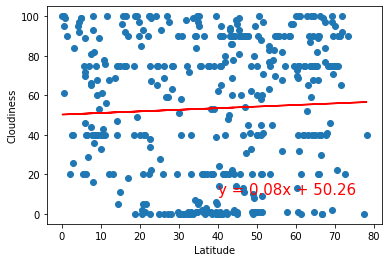

In [29]:
#Create scatter plot
x_axis= northern_hemi_df["Cloudiness"]
y_axis= northern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


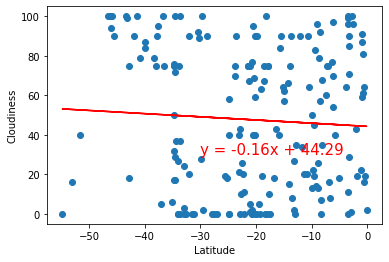

In [30]:
#Create scatter plot
x_axis= southern_hemi_df["Cloudiness"]
y_axis= southern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


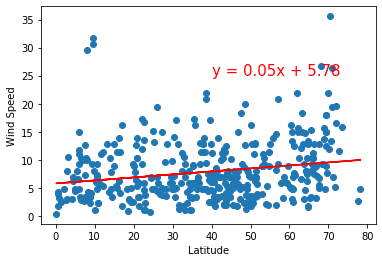

In [31]:
#Create scatter plot
x_axis= northern_hemi_df["Wind Speed"]
y_axis= northern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


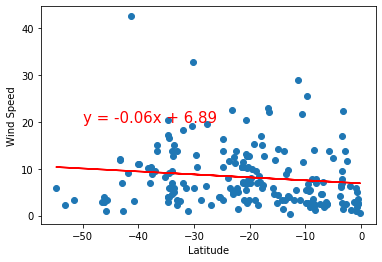

In [32]:
#Create scatter plot
x_axis= southern_hemi_df["Wind Speed"]
y_axis= southern_hemi_df["Lat"]
plt.scatter(x_axis, y_axis)

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#Create equation
equation=slope * x_axis + intercept

#Plot line
plt.plot(x_axis, equation)
